In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [3]:
data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
len(data[0])

2

In [0]:
(x_train,y_train),(x_test,y_test)=data

In [7]:
len(x_train)

60000

0

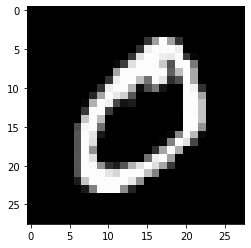

In [8]:
plt.imshow(x_train[1],cmap='gray')
y_train[1]

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
num_of_samples=[]
 
cols = 5
num_classes = 10

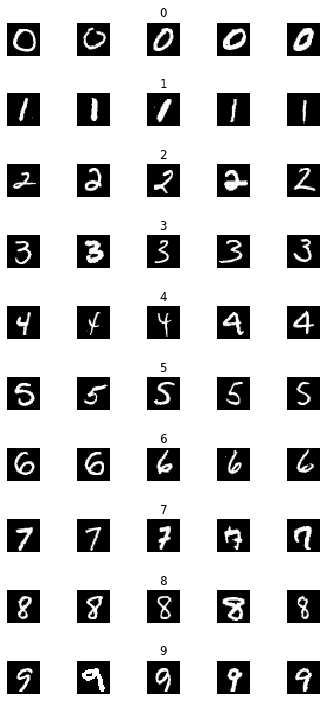

In [11]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = x_train[y_train == j]
      #axs[j][i].imshow(x_selected[0])
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


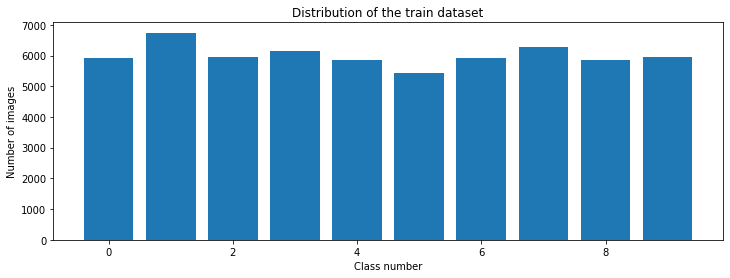

In [12]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
#plt.xticks(list(range(0, num_classes)))
plt.show()

In [0]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
y_train[0]

5

In [0]:
y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
y_train.shape

(60000, 10)

In [0]:
def le_net():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (28,28,1),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

In [22]:
lenet = le_net()
lenet.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000   

In [23]:
history=lenet.fit(x_train,
                  y_train,
                  epochs=50,
                  validation_split=0.1,
                  batch_size=400,
                  verbose=1,shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/50





54000/54000 [==============================] - 16s 301us/step - loss: 0.5750 - acc: 0.8185 - val_loss: 0.0955 - val_acc: 0.9717
Epoch 2/50
54000/54000 [==============================] - 1s 21us/step - loss: 0.1435 - acc: 0.9566 - val_loss: 0.0634 - val_acc: 0.9810
Epoch 3/50
54000/54000 [==============================] - 1s 21us/step - loss: 0.1036 - acc: 0.9688 - val_loss: 0.0494 - val_acc: 0.9865
Epoch 4/50
54000/54000 [==============================] - 1s 22us/step - loss: 0.0854 - acc: 0.9743 - val_loss: 0.0420 - val_acc: 0.9870
Epoch 5/50
54000/54000 [==============================] - 1s 23us/step - loss: 0.0735 - acc: 0.9778 - val_loss: 0.0407 - val_acc: 0.9883
Epoch 6/50
54000/54000 [==============================] - 1s 22us/step - loss: 0.0648 - acc: 0.9799 - val_loss: 0.0416 - val_acc: 0.9880
Epoch 7/50
54000/54000 [=

In [0]:
lenet.save("digit.h5")

In [0]:
!ls

digit.h5  sample_data


In [0]:
from google.colab import files

In [0]:
files.download("digit.h5")

Text(0.5, 0, 'epoch')

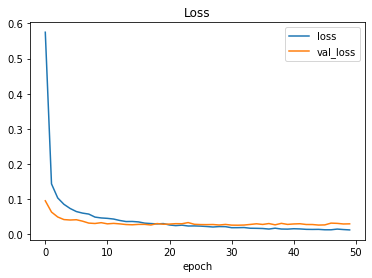

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

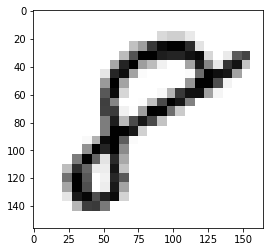

In [26]:
import requests
from PIL import Image
url="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_169,h_161/https://kx.com/images/03_IMAGES/160520-8.png"
response = requests.get(url,stream=True)
img = Image.open(response.raw).convert('L')
plt.imshow(img,cmap='gray')

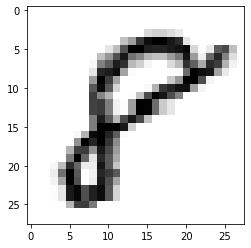

In [27]:
import cv2
img_array  = np.asarray(img)
res = cv2.resize(img_array,(28,28))
# image=255-res
plt.imshow(res,cmap='gray')

In [0]:
res = res/255
res = res.reshape(1,28,28,1)

In [29]:
lenet.predict_classes(res)
# lenet.predict(res)

array([8])

In [30]:
lenet.predict(res)

array([[1.2739724e-04, 2.0378377e-06, 9.0998137e-06, 2.2534715e-07,
        6.9427500e-07, 2.3846105e-06, 1.4372541e-03, 2.5950732e-07,
        9.9841940e-01, 1.1539892e-06]], dtype=float32)